# **Introduction**
These exercises will help you practice data preparation and Exploratory Data Analysis (EDA) which are critical steps before applying machine learing algorithms. 

Lets upload the data required for the exersice as follows.

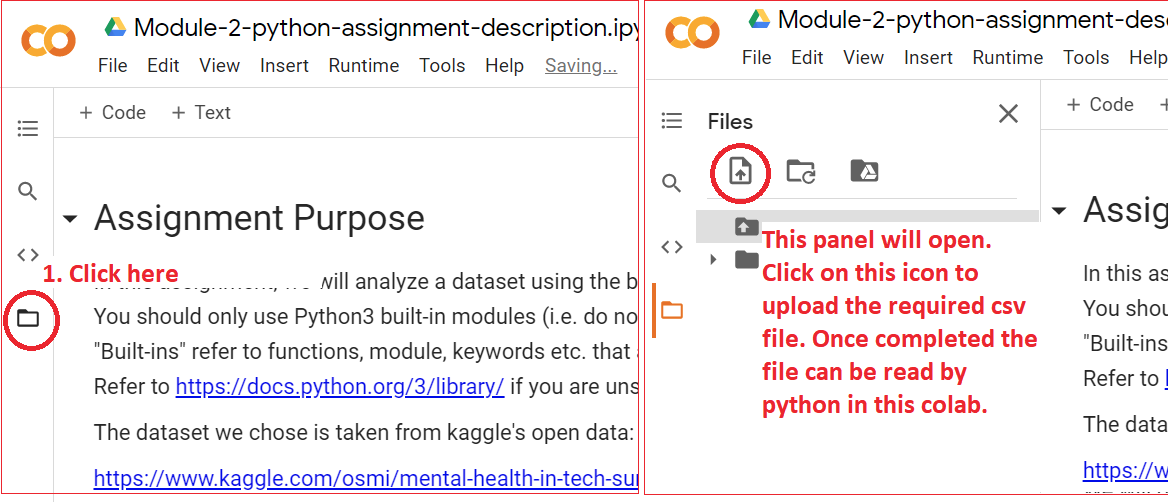

# Exercise 1: Read and understand the data
In this exercise, we will read the data we uploaded into colab with python. We will then perform some exploratory analysis of the data. To make this process easier, we will make use of a library in python called [pandas](https://pandas.pydata.org/). You can think of pandas as a collection of convenience functions that will allow us to perform data related tasks with python very easily.

We tell python to use the `pandas` library by the command `import pandas as pd`. Note here that we have imported more libraries in the next few lines. 
- [numpy](https://numpy.org/) is used for manipulation of arrays of numbers
- [matplotlib](https://matplotlib.org/) is used to plot data



In [1]:
# basic libraries you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


## Reading the data
For this exercise, the data is given to you as a csv file (comma seperated values). You have the option of opening this file with excel to see its contents, but for the rest of the task, we need the data to be read into python. Fortunately, pandas has the `read_csv` method that can read and understand csv files. Pandas expects you to give a specific set of inputs. You can read about the specific requirements in the pandas documentation of the function:
[https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

Observe that in the documentation, some input parameters to `read_csv` have the term "default" associated with them. For eg. in `Sep` parameter below

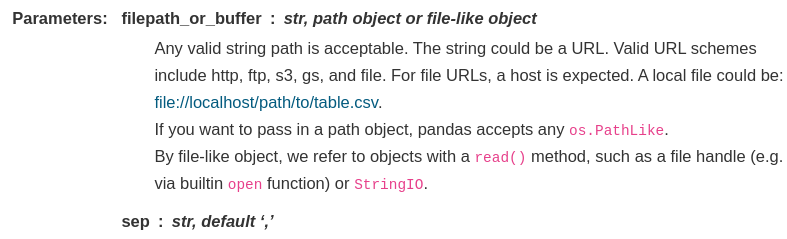

This means that if you don't specify a value for this parameter, pandas will assume the default value specified in documentation.

Note that in this tutorial, we will introduce a wide variety of libraries with a large set of available functions. Please take the time to go to the relevant documentation links to understand the what functions are available and how they expected to be used.

In [2]:
# load the following data frame
ex_df = pd.read_csv('exercises-data.csv')
print('top 10 rows of the data is:')
display(ex_df.head(10))
print('data shape is:', ex_df.shape)

top 10 rows of the data is:


,id,label,feature_a,feature_b,feature_c,feature_d
0,842302,M,17.99,10.38,1001.0,High
1,842517,M,20.57,17.77,1326.0,Low
2,84300903,M,19.69,21.25,1203.0,High
3,84348301,M,11.42,20.38,386.1,High
4,84358402,M,20.29,14.34,1297.0,High
5,843786,M,12.45,15.70,NaN,High
6,844359,M,18.25,19.98,1040.0,Medium
7,84458202,M,13.71,20.83,577.9,High
8,844981,M,13.00,21.82,519.8,High
9,84501001,M,12.46,24.04,475.9,High


data shape is: (569, 6)


Note above that pandas reads all data into data stuctures called `DataFrames`. You can think of these `DataFrames` as tables with rows and columns. `DataFrames` also have several useful methods and attributes that are available through the data structure and can help us with our data science tasks. We have used `.head()` and `.shape` in code block above. 

## Getting to know the data
Now that we have read the data, we can use the following code to get a basic idea of the type of data present in the `DataFrame`.

In [3]:
# checking the data generally 
ex_df.describe()
# ex_df.info()

,id,feature_a,feature_b,feature_c
count,5.690000e+02,569.000000,569.000000,553.000000
mean,3.037183e+07,14.411299,19.289649,650.984448
std,1.250206e+08,5.484075,4.301036,350.184084
min,8.670000e+03,6.981000,9.710000,143.500000
25%,8.692180e+05,11.700000,16.170000,418.700000
50%,9.060240e+05,13.370000,18.840000,546.100000
75%,8.813129e+06,15.850000,21.800000,781.000000
max,9.113205e+08,82.700000,39.280000,2501.000000


In [4]:
# check column types
ex_df.dtypes

id             int64
label         object
feature_a    float64
feature_b    float64
feature_c    float64
feature_d     object
dtype: object

In [5]:
# get dataframe information
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         569 non-null    int64  
 1   label      569 non-null    object 
 2   feature_a  569 non-null    float64
 3   feature_b  569 non-null    float64
 4   feature_c  553 non-null    float64
 5   feature_d  569 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 26.8+ KB


In [6]:
# checking the label
ex_df.label.value_counts()

B    357
M    212
Name: label, dtype: int64

Because this is an introductory exercise, the labels have already been determined and exist in the `DataFrame`. In practical situations, you will have to calculate these labels depending on the business problem you are trying to solve (e.g. shifting the values of a total sales column by a week so you can have a label that represents week-ahead demand forecasts). 

In [7]:
# check categorical column
ex_df.feature_d.value_counts()

High      216
Low       199
Medium    154
Name: feature_d, dtype: int64


Another observation we make is that the `feature_d` columns appears to contain categorical information. We will process the information accordingly by explictly changing the type of the column.

In [8]:
# change the type of category column to category
ex_df['feature_d'] = ex_df['feature_d'].astype('category')
ex_df['label'] = ex_df['label'].astype('category')
ex_df.dtypes

id              int64
label        category
feature_a     float64
feature_b     float64
feature_c     float64
feature_d    category
dtype: object

Plotting the data is a very useful way to get some quick intuitions about what kind of data you are working with.

Text(0.5, 1.0, 'Plot of numerical features')

<Figure size 720x360 with 0 Axes>

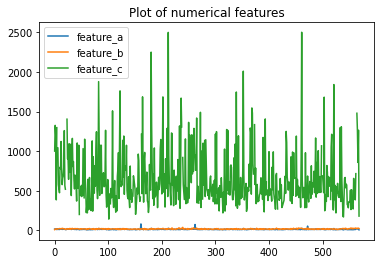

In [9]:
plt.figure(figsize = (10, 5))
ex_df[['feature_a','feature_b','feature_c']].plot()
plt.title('Plot of numerical features')

Looks like the scale of the features is quite different with `c` being quite large and the `a` and `b` being quite small. We'll deal with this later.

Text(0.5, 1.0, 'Histogram of categorical features')

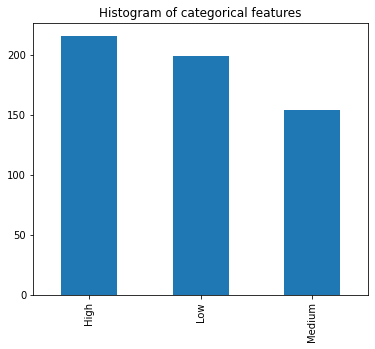

In [10]:
plt.figure(figsize = (6, 5))
ex_df['feature_d'].value_counts().plot(kind='bar')
plt.title('Histogram of categorical features')

Text(0.5, 1.0, 'Histogram of labels')

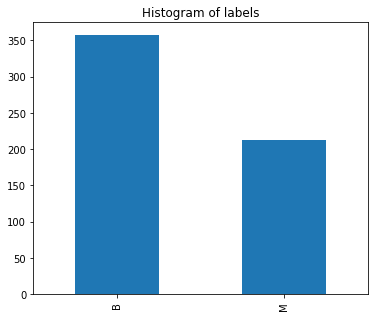

In [11]:
plt.figure(figsize = (6, 5))
ex_df['label'].value_counts().plot(kind='bar')
plt.title('Histogram of labels')

We can see that labels are `B` and `M`. These are alphabetic characters and machine learning algorithms do not understand how to manipulate them. We need to encode these as numerical values to allow machine learning to be effective at predicting the labels.

The other important library that we use in this notebook is called Scikit-learn (https://scikit-learn.org/stable/). It is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction. 

Encoded classes are ['B' 'M']
Encoded values of classes are [0 1]


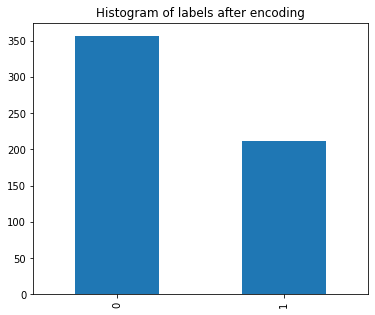

In [12]:
# Convert labels from nominal to numeric ( B -> 0 and M -> 1)
# Method 1: category code
# make sure you have converted the type of the column to category (as we did above)
# ex_df['label'] = ex_df['label'].cat.codes
# print('check converted data', ex_df['label'].value_counts())

# Method 2: LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y2 = labelencoder.fit_transform(ex_df['label'])
ex_df['label'] = pd.Series(y2)
plt.figure(figsize=(6, 5))
ex_df['label'].value_counts().plot(kind='bar')
plt.title('Histogram of labels after encoding')
print(f'Encoded classes are {labelencoder.classes_}')
print(f'Encoded values of classes are {labelencoder.transform(labelencoder.classes_)}')

# Exercise 2: Features scaling

Let us now get back to the feature scale issue we discussed. Since the value range of the variables are very different, we will scale all of them to the same range.

1. Load exercise dataset
2. Select only columns `feature_a` and 	`feature_b`
3. Make a copy and normalize
4. Make a copy and standardize
5. (Extra) visualize all three datasets (tip: use `plt.figure()`, `plt.plot()`, and `plt.show()`)

**Important Note**: The code we show here is to demonstrate the effects of 
normalisation. Normalisation should not be performed on the entire dataset. Details will be provided later (normalisation parameters should be computed from train set and no test point should be involved in this calculation)

In [13]:
selected_ex_df = ex_df[['feature_a', 'feature_b', 'feature_c']]
selected_ex_df_cp1 = selected_ex_df.copy()
selected_ex_df_cp2 = selected_ex_df.copy()

# normalize 
# method1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
norm_selected_ex = scaler.fit_transform(selected_ex_df_cp1) 
norm_selected_ex_df = pd.DataFrame(norm_selected_ex)
norm_selected_ex_df.rename(columns={0: "feature_a", 1: "feature_b", 2: "feature_c"}, inplace=True)
# method2
# def normalize(df):
#   result = df.copy()
#   for feature_name in df.columns:
#       max_value = df[feature_name].max()
#       min_value = df[feature_name].min()
#       result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
#   return result
# norm_selected_ex_df = normalize(selected_ex_df_cp1) 

# standardization
# method1
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler() 
standardized_selected_ex = scaler_std.fit_transform(selected_ex_df_cp2)
standardized_selected_ex_df = pd.DataFrame(standardized_selected_ex)
standardized_selected_ex_df.rename(columns={0: "feature_a", 1: "feature_b", 2: "feature_c"}, inplace=True)

# method2
# def standardize(df):
#   result = df.copy()
#   for feature_name in df.columns:
#       mean_value = df[feature_name].mean()
#       std_value = df[feature_name].std()
#       result[feature_name] = (df[feature_name] - mean_value) / std_value
#   return result
# standardized_selected_ex_df = standardize(selected_ex_df_cp2) 

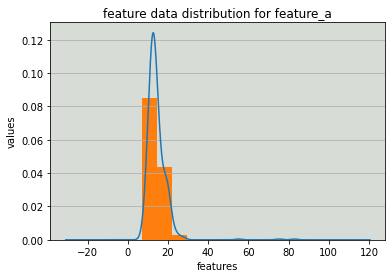

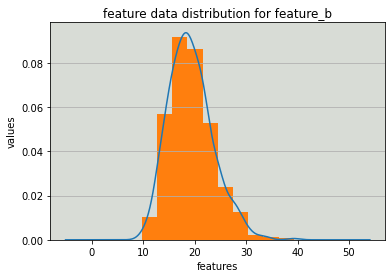

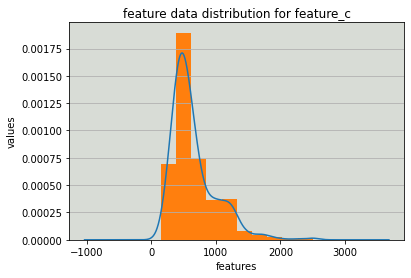

In [14]:
def get_feature_dist(df:pd.DataFrame, feature_name:str):
  fig, ax = plt.subplots()
  df[feature_name].plot.kde(ax=ax, legend=False, title=f'feature data distribution for {feature_name}')
  df[feature_name].plot.hist(density=True, ax=ax)
  ax.set_ylabel('values')
  ax.set_xlabel('features')
  ax.grid(axis='y')
  ax.set_facecolor('#d8dcd6')
# featuer data distribution
get_feature_dist(selected_ex_df, 'feature_a')
get_feature_dist(selected_ex_df, 'feature_b')
get_feature_dist(selected_ex_df, 'feature_c')

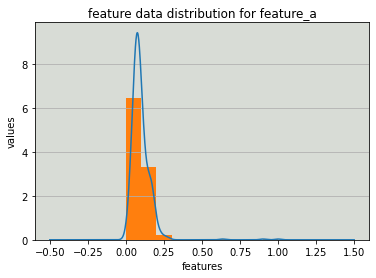

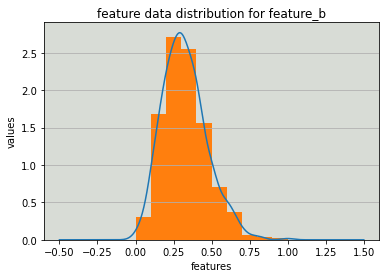

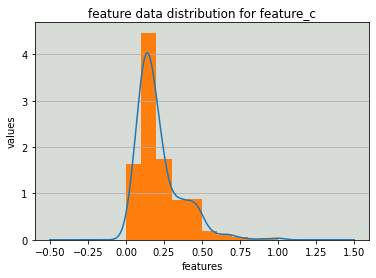

In [15]:
# featuer data distribution after nomalization
get_feature_dist(norm_selected_ex_df, 'feature_a')
get_feature_dist(norm_selected_ex_df, 'feature_b')
get_feature_dist(norm_selected_ex_df, 'feature_c')

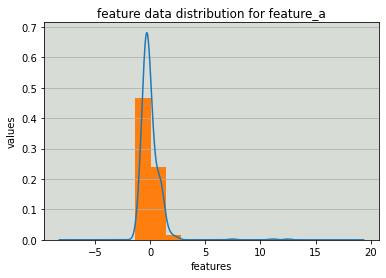

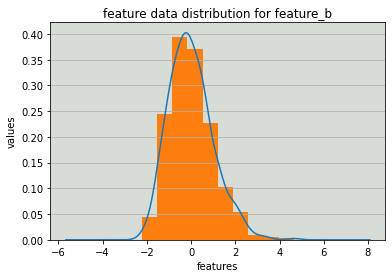

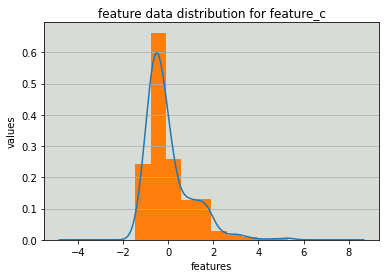

In [16]:
# featuer data distribution after standardization
get_feature_dist(standardized_selected_ex_df, 'feature_a')
get_feature_dist(standardized_selected_ex_df, 'feature_b')
get_feature_dist(standardized_selected_ex_df, 'feature_c')

# Exercise 3: One hot encoding 
Similar to labels, we need to encode categorical features. 
1. Load exercise data
2. Convert `feature_d`, which is nominal, to one hot encoded features

Observe that here we didnt use label encoders. Question to the reader: Why is the label encoder not appropriate to use in this situation?


In [17]:
f_d_df = ex_df[['feature_d']]
# method 1
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(f_d_df)
f_d_oh = onehot_encoder.transform(f_d_df).toarray()
print(f_d_oh)

# method2 for finding f_d_oh
# f_d_oh = pd.get_dummies(f_d_df)
# print(f_d_oh)

f_d_oh_df = pd.DataFrame(f_d_oh)
ex_df= pd.concat([ex_df, f_d_oh_df], axis=1).drop(['feature_d'], axis=1)
ex_df.head()
ex_df.rename(columns={0: 'feature_d_low', 1: 'feature_d_medium', 2: 'feature_d_high'}, inplace=True)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [18]:
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                569 non-null    int64  
 1   label             569 non-null    int64  
 2   feature_a         569 non-null    float64
 3   feature_b         569 non-null    float64
 4   feature_c         553 non-null    float64
 5   feature_d_low     569 non-null    float64
 6   feature_d_medium  569 non-null    float64
 7   feature_d_high    569 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 35.7 KB


# Exercise 4: Discretization
Sometimes, it helps to break down the range of the numerical values into categories.
1. Load exercise data
2. Select only columns `feature_a` and 	`feature_b` from the dataset.
3. Discretize numerical variables into 4 nominal values using equal width (`pd.cut`)
4. Discretize numerical variables into 4 nomnial values using Equal Frequency (`pd.qcut`)
5. Show value counts for each discretization method


The major distinction is that `qcut` will calculate the size of each bin in order to make sure the distribution of data across the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, `cut` is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

A good resource for learning this topic is here:
https://pbpython.com/pandas-qcut-cut.html

In [28]:
selected_ex_df = ex_df[['feature_a', 'feature_b']]
selected_ex_df.describe()


,feature_a,feature_b
count,569.000000,569.000000
mean,14.175209,19.289649
std,3.584245,4.301036
min,8.458360,9.710000
25%,11.700000,16.170000
50%,13.370000,18.840000
75%,15.850000,21.800000
max,26.206800,39.280000


In [29]:
# using cut
label_name = ["category1", "category2", "category3", "category4"]
dis_feature_a = pd.cut(selected_ex_df.feature_a.values, 4, labels=label_name)
dis_feature_b = pd.cut(selected_ex_df.feature_b.values, 4, labels=label_name)
print(dis_feature_a.value_counts())
print(dis_feature_b.value_counts())

category1    249
category2    211
category3     92
category4     17
dtype: int64
category1    185
category2    316
category3     64
category4      4
dtype: int64


In [30]:
# using qcut
label_name = ["category1", "category2", "category3", "category4"]
disq_feature_a = pd.qcut(selected_ex_df.feature_a.values, 4, labels=label_name)
disq_feature_b = pd.qcut(selected_ex_df.feature_b.values, 4, labels=label_name)
print(disq_feature_a.value_counts())
print(disq_feature_b.value_counts())

category1    143
category2    142
category3    142
category4    142
dtype: int64
category1    143
category2    142
category3    142
category4    142
dtype: int64


# Exercise 5: Outlier removal

1. Load exercise data
2. Outliers are present in `feature_a`, detect them using box plot
3. Remove or replace the outlier using 1th and 99th percentile



In [22]:
ex_df[['feature_a']].describe()

,feature_a
count,569.000000
mean,14.411299
std,5.484075
min,6.981000
25%,11.700000
50%,13.370000
75%,15.850000
max,82.700000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


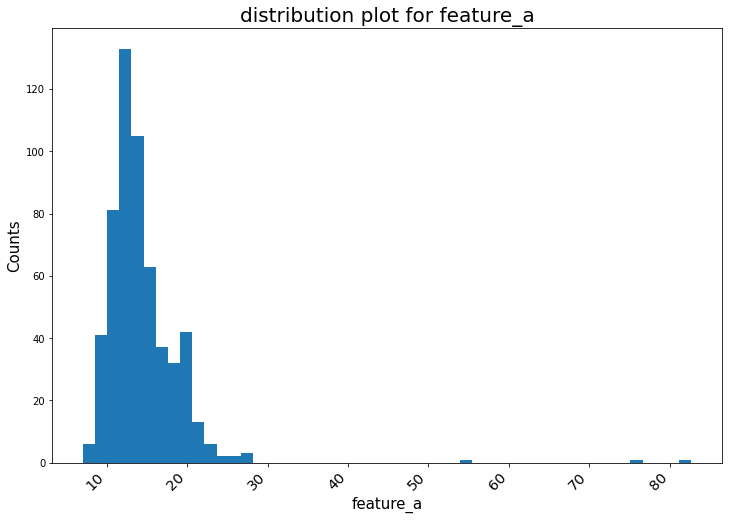

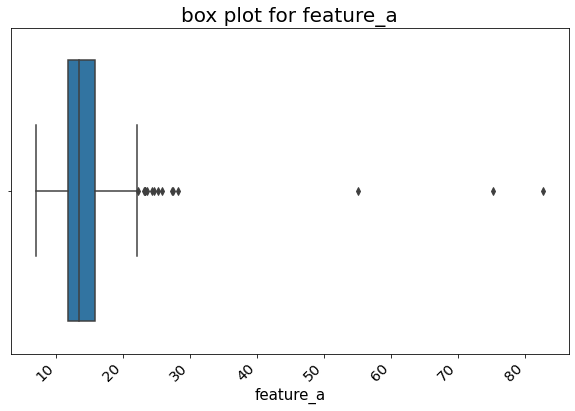

In [23]:
# outlier detection with visualization
import matplotlib.pyplot as plt
import seaborn as sns
# functions
def plot_numerical_dist(df: pd, feature: str):
    """
    show distribution plot for numerical variable.
    Authoer: Sara Soltaninejad
    """
    plt.figure(figsize=(12, 8))
    b = sns.distplot(df[feature], kde=False, norm_hist=False, hist_kws={"alpha": 1})
    b.set_xlabel(feature, fontsize=15)
    b.set_ylabel("Counts", fontsize=15)
    plt.xticks(rotation=45, horizontalalignment='right', fontsize='x-large')
    title_str = 'distribution plot for ' + feature
    plt.title(title_str, fontsize=20)
    plt.show()
def get_box_plot(df: pd, feature: str):
    """
    show box plot for numerical variable.
    Authoer: Sara Soltaninejad
    """
    plt.figure(figsize=(10, 6))
    b = sns.boxplot(x=df[feature])
    b.set_xlabel(feature, fontsize=15)
    plt.xticks(rotation=45, horizontalalignment='right', fontsize='x-large')
    title_str = 'box plot for ' + feature
    plt.title(title_str, fontsize=20)
    plt.show()
# calling functions for getting histogram and box plots
plot_numerical_dist(ex_df, 'feature_a')
get_box_plot(ex_df, 'feature_a')

In the above visualization functions, I used different arguments (such as fontsize, rotation, ..) for the distribution and box plot to show how easily you can customise your visualization.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms

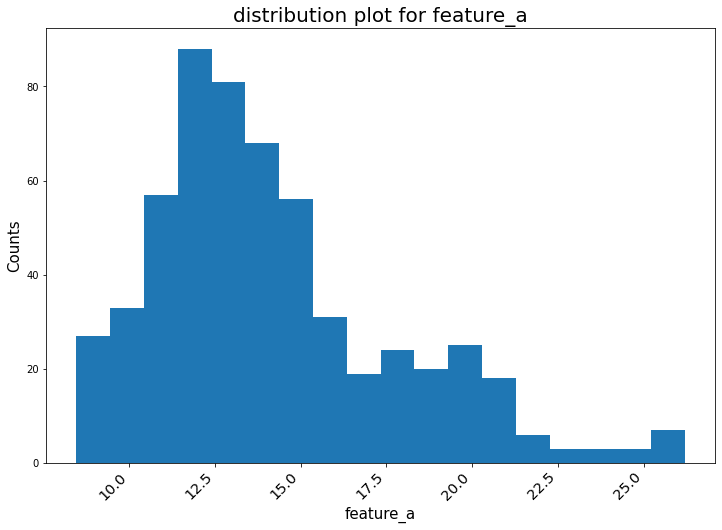

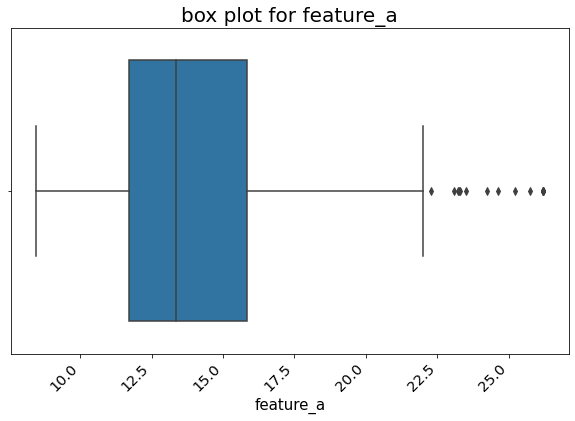

In [24]:
# outlier removal
q_low = ex_df["feature_a"].quantile(0.01)
q_hi  = ex_df["feature_a"].quantile(0.99)

# method 1 replacing outliers
ex_df.feature_a.loc[ex_df.feature_a > q_hi]  = q_hi
ex_df.feature_a.loc[ex_df.feature_a < q_low]  = q_low

# method 2 dropping outliers
# ex_df["feature_a"] = ex_df["feature_a"].clip(lower=q_low, upper=q_hi)

plot_numerical_dist(ex_df, 'feature_a')
get_box_plot(ex_df, 'feature_a')

# Exercise 6: Handle missing values 

1. Load exercise data
2. Identify features with missing values (you can use `isnull()` and then `any()` or `sum()`)
3. Replace the null values with average for that feature (tip: `fillna()`)
4. Use `SimpleImputer` from `sklearn.impute` to simplify your code.







In [25]:
from sklearn.impute import SimpleImputer
# check null values in all columns
print('before removing nan values:\n', ex_df.isna().sum())

before removing nan values:
 id                   0
label                0
feature_a            0
feature_b            0
feature_c           16
feature_d_low        0
feature_d_medium     0
feature_d_high       0
dtype: int64


In [26]:
null_columns = "feature_c"
ex_df[null_columns].fillna((ex_df["feature_c"].mean()), inplace=True)
print('after removing nan values:\n', ex_df.isna().sum())

after removing nan values:
 id                  0
label               0
feature_a           0
feature_b           0
feature_c           0
feature_d_low       0
feature_d_medium    0
feature_d_high      0
dtype: int64


# Exercise 7: Features engineering

1. Load exercise data
2. Add new column `feature_e` that is equal `(feature_a + feature_b) / feature_c`


In [27]:
# make new feature
ex_df['feature_e'] = (ex_df['feature_a'] + ex_df['feature_b']) / ex_df['feature_c']
ex_df['feature_e'].describe()

count    569.000000
mean       0.060587
std        0.023015
min        0.017878
25%        0.044972
50%        0.057348
75%        0.069968
max        0.198934
Name: feature_e, dtype: float64